## 1. Importing Libraries and reading data 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
df = pd.read_csv(r'C:\Users\abanoup\Desktop\diabetes_dataset_with_notes.csv')


In [3]:
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,"Overweight, advised dietary and exercise modif..."
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Healthy BMI range.
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,"Young patient, generally lower risk but needs ..."
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,"Overweight, advised dietary and exercise modif..."
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [5]:
df.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


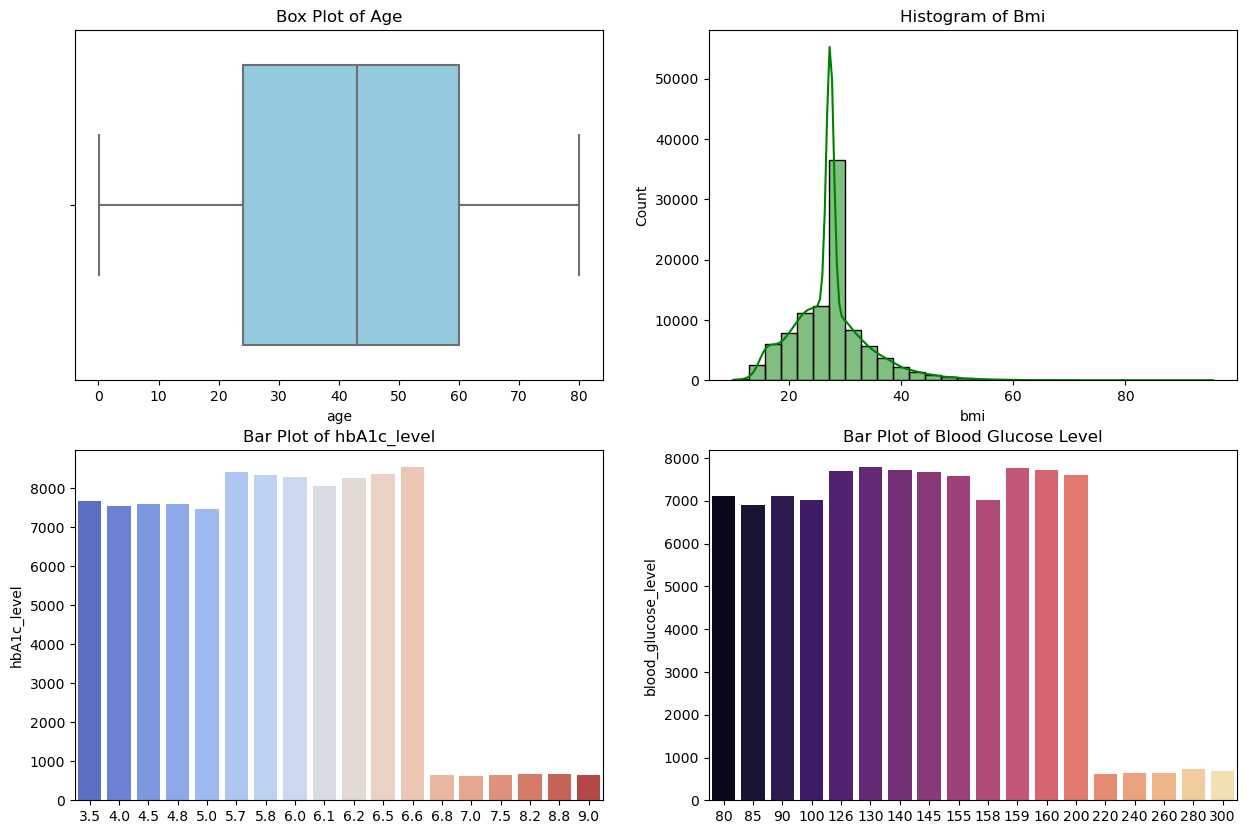

In [6]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x=df["age"], color="skyblue")
plt.title("Box Plot of Age")

plt.subplot(2, 2, 2)
sns.histplot(df["bmi"], bins=30, kde=True, color="green")
plt.title("Histogram of Bmi")

plt.subplot(2, 2, 3)
sns.barplot(x=df["hbA1c_level"].value_counts().index, y=df["hbA1c_level"].value_counts(), palette="coolwarm")
plt.title("Bar Plot of hbA1c_level")

plt.subplot(2, 2, 4)
sns.barplot(x=df["blood_glucose_level"].value_counts().index, y=df["blood_glucose_level"].value_counts(), palette="magma")
plt.title("Bar Plot of Blood Glucose Level")

# عرض المخططات
plt.show()


## 2. Exploratory Data Analysis

### Year

In [7]:
# Exploring the year column
year = df['year'].value_counts().reset_index().rename(columns={'count':'number_of_entires'})

In [8]:
year

,index,year
0,2019,79745
1,2015,8760
2,2016,8760
3,2018,2678
4,2020,42
5,2022,8
6,2021,7


 ### Gender 

In [9]:
gender = df['gender'].value_counts().reset_index().rename(columns={0:'No of entries'})
gender

,index,gender
0,Female,58552
1,Male,41430
2,Other,18


In [10]:
print(gender.head())
print(gender.columns)


    index  gender
0  Female   58552
1    Male   41430
2   Other      18
Index(['index', 'gender'], dtype='object')


In [11]:
gender = df['gender'].value_counts().reset_index()
gender.columns = ['gender', 'count']


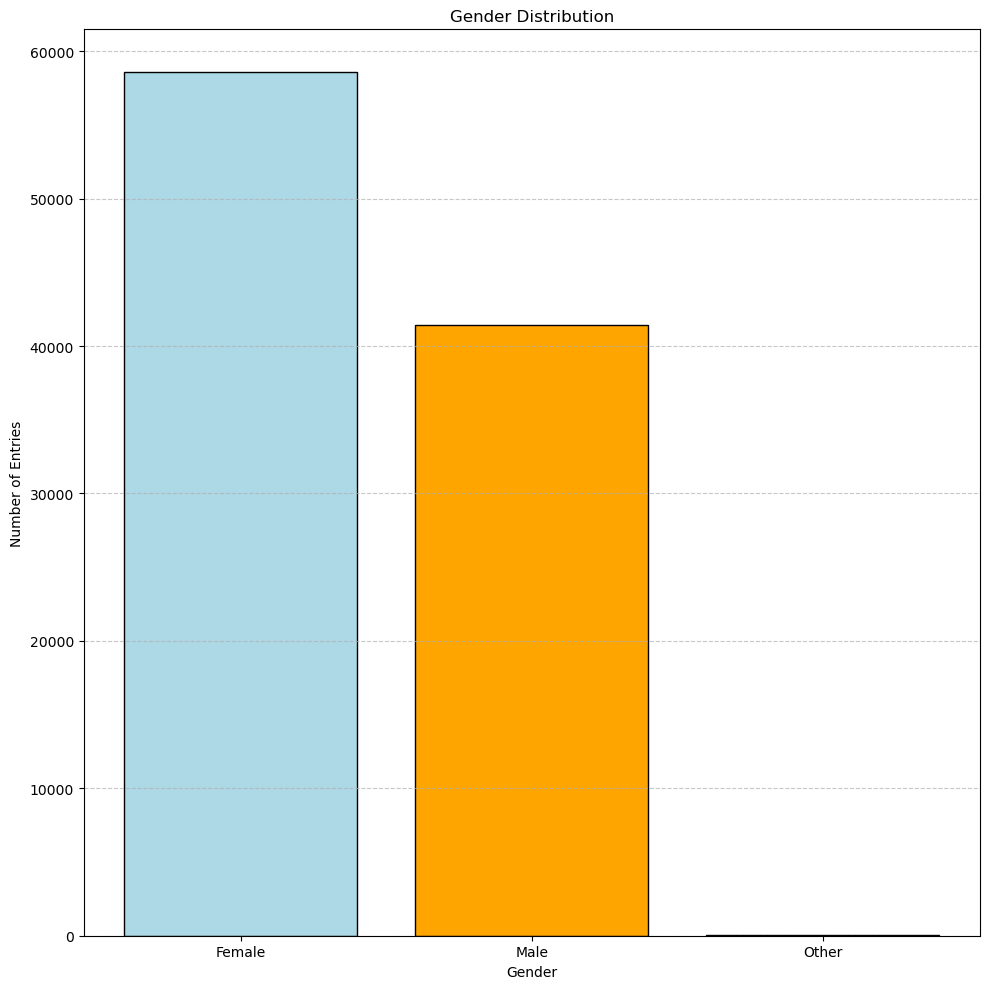

In [12]:
plt.figure(figsize=(10, 10))
plt.bar(gender['gender'], gender['count'], color=['lightblue', 'orange', 'purple'], edgecolor='black')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Entries")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Age

In [13]:
# Exploring the age column
age = df['age'].value_counts().reset_index().rename(columns={'count':'No_of_entires'})

In [14]:
age

,index,age
0,80.00,5621
1,51.00,1619
2,47.00,1574
3,48.00,1568
4,53.00,1542
...,...,...
97,0.48,83
98,1.00,83
99,0.40,66
100,0.16,59


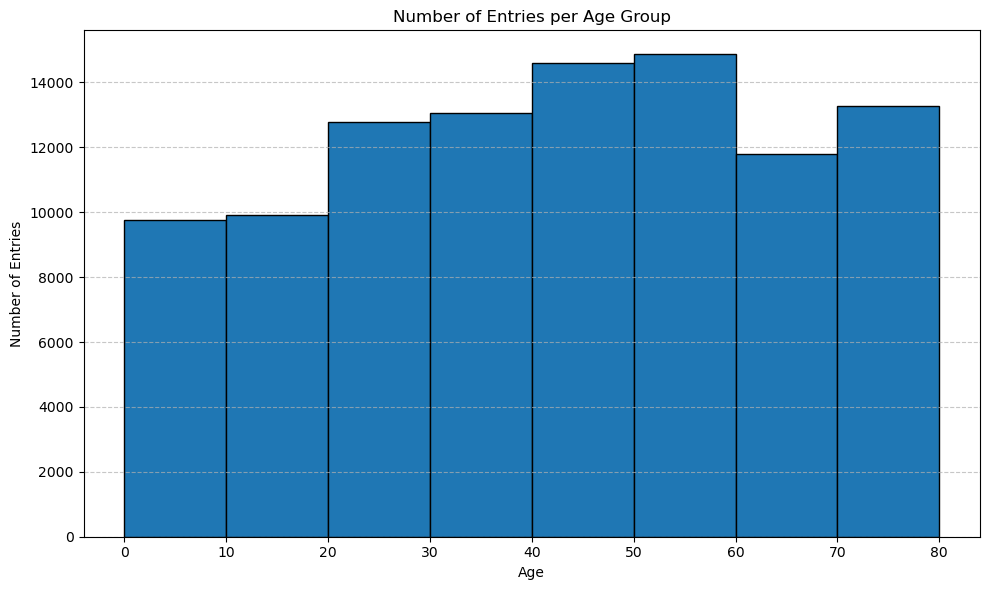

In [15]:

plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=[0,10,20,30,40,50,60,70,80], edgecolor='black')
plt.title('Number of Entries per Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Entries')
plt.xticks([0,10,20,30,40,50,60,70,80])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Race

In [16]:
#Exploring the races 
race = df[['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic','race:Other']]

In [17]:
zeros = (race==0).sum()
ones = (race==1).sum()
race_counts = pd.DataFrame({'zero':zeros,'one':ones})
race_counts


,zero,one
race:AfricanAmerican,79777,20223
race:Asian,79985,20015
race:Caucasian,80124,19876
race:Hispanic,80112,19888
race:Other,80002,19998


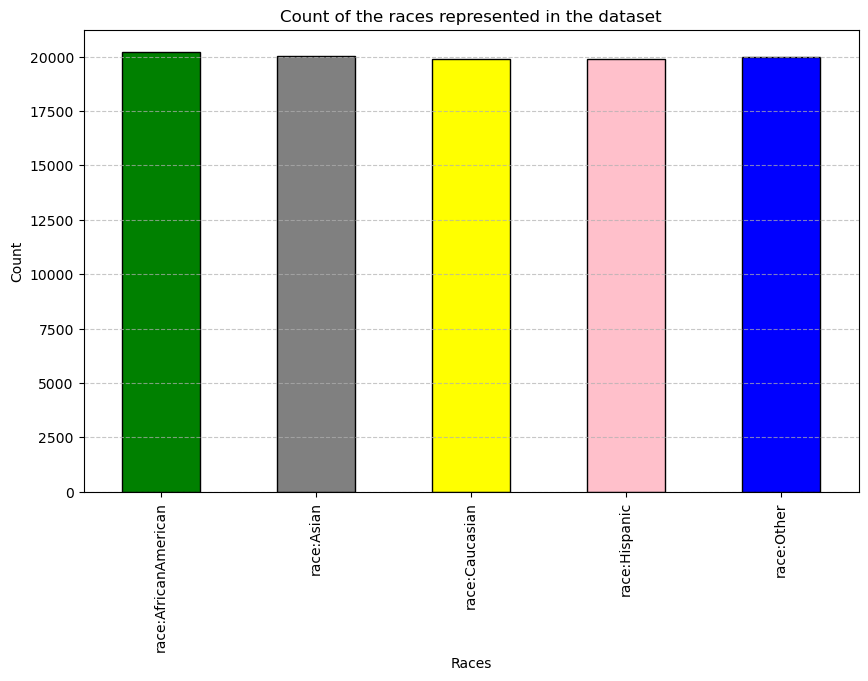

In [18]:
plt.figure(figsize=(10,6))
race_counts['one'].plot(kind='bar', edgecolor='black',color=['green','grey','yellow','pink','blue'])
plt.title('Count of the races represented in the dataset')
plt.xlabel('Races')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)


All the races are fairly represented in the dataset 

### Location


In [19]:
#Exploring locations
df['location'].nunique()

55

In [20]:
df['location'].value_counts()

Iowa                    2038
Nebraska                2038
Kentucky                2038
Hawaii                  2038
Florida                 2037
Minnesota               2037
New Jersey              2037
Arkansas                2037
Delaware                2036
Kansas                  2036
Michigan                2036
Massachusetts           2036
Maine                   2036
District of Columbia    2036
Louisiana               2036
Georgia                 2036
Oregon                  2036
Pennsylvania            2036
Alabama                 2036
Illinois                2036
Rhode Island            2035
Colorado                2035
Maryland                2035
New York                2035
Connecticut             2035
Mississippi             2035
Missouri                2035
Alaska                  2035
North Carolina          2035
New Hampshire           2035
North Dakota            2035
South Dakota            2033
Montana                 2033
New Mexico              2033
Idaho         

Wisconsin and Wyoming have lesser entires as compared to other locations.                 

### Hypertension 

In [21]:
BP = df['hypertension'].value_counts()

In [22]:
BP.index=['No Hypertension','Have Hypertension']
BP

No Hypertension      92515
Have Hypertension     7485
Name: hypertension, dtype: int64

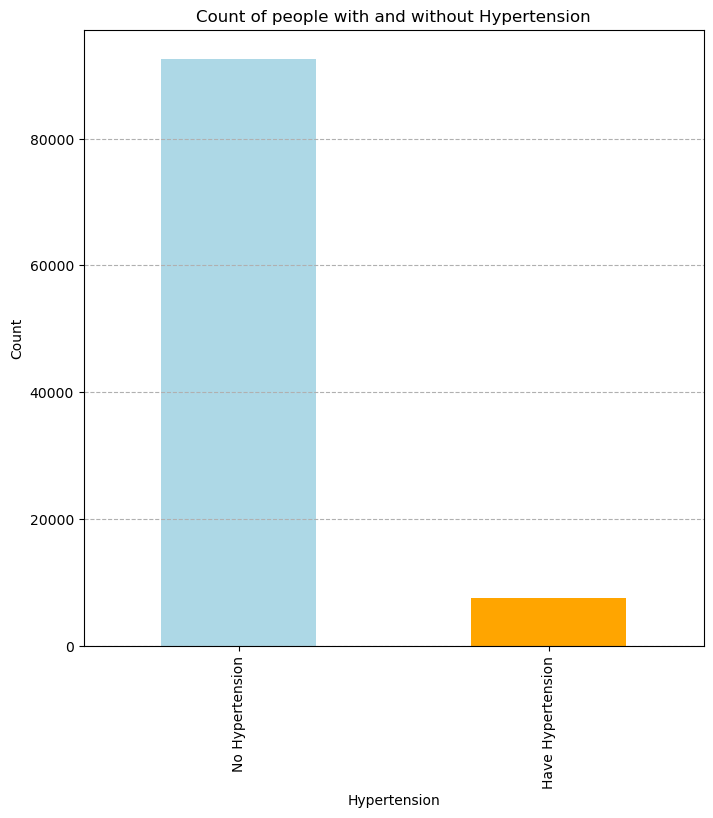

In [23]:
plt.figure(figsize=(8,8))
BP.plot(kind='bar', color=['lightblue','orange'], xlabel='Hypertension', ylabel='Count', title='Count of people with and without Hypertension')
plt.grid(axis='y', linestyle='--')
plt.show()



### Heart Disease 

In [24]:
heart_disease = df['heart_disease'].value_counts()

In [25]:
heart_disease.index=['No Heart Disease', 'Have Heart Disease']
heart_disease

No Heart Disease      96058
Have Heart Disease     3942
Name: heart_disease, dtype: int64

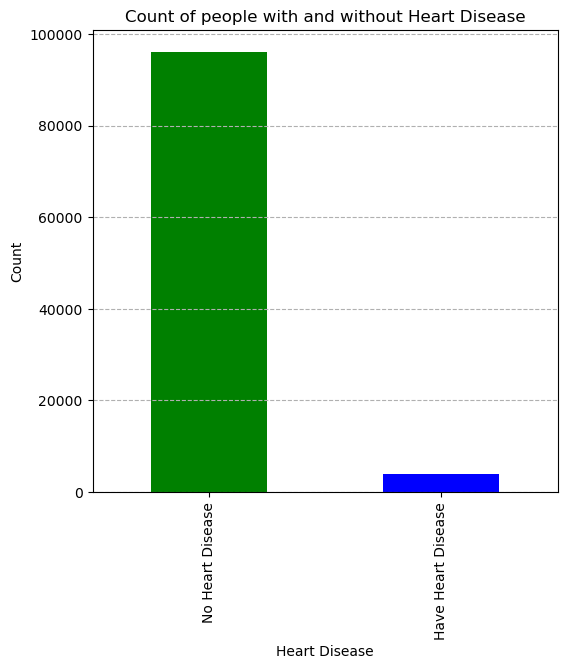

In [26]:
plt.figure(figsize=(6,6))
heart_disease.plot(kind='bar', color=['green','blue'], xlabel='Heart Disease', ylabel='Count', title='Count of people with and without Heart Disease')
plt.grid(axis='y', linestyle='--')
plt.show()

### Smoking

In [27]:
smoke = df['smoking_history'].value_counts()

In [28]:
smoke

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

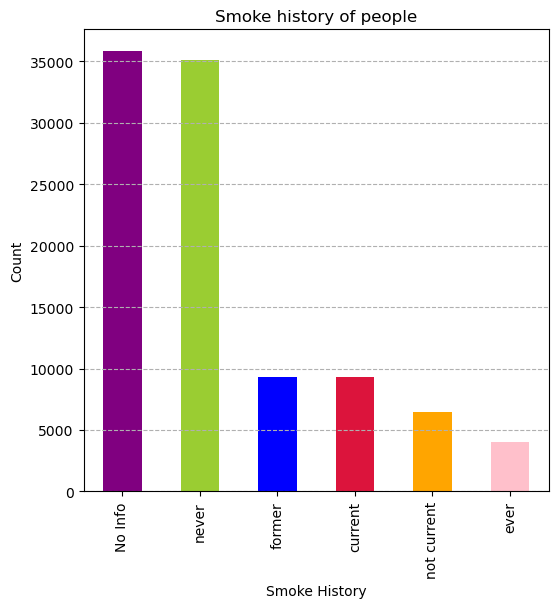

In [29]:
plt.figure(figsize=(6,6))
smoke.plot(kind='bar', color=['purple','yellowgreen','blue','crimson','orange','pink'], xlabel='Smoke History', ylabel='Count', title='Smoke history of people')
plt.grid(axis='y', linestyle='--')
plt.show()

### BMI 

In [30]:
adults = df[df['age'] >= 20] 
children = df[df['age'] < 20]

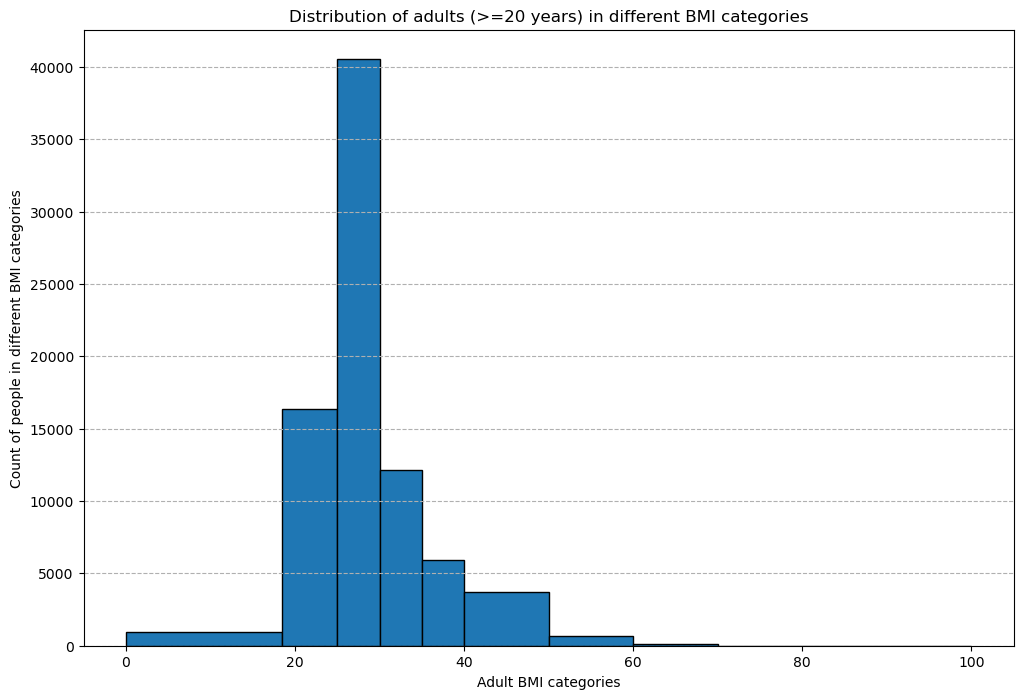

In [31]:
plt.figure(figsize=(12,8))
plt.grid(axis='y',linestyle='--')
plt.hist(adults['bmi'],bins=[0,18.5, 25, 30, 35, 40,50,60, 70, 80, 90, 100], edgecolor='black')
plt.xlabel("Adult BMI categories")
plt.ylabel("Count of people in different BMI categories")
plt.title("Distribution of adults (>=20 years) in different BMI categories")
plt.show()

In [32]:
print("Underweight: ",adults[adults['bmi'] < 18.5].bmi.count())

Underweight:  931


In [33]:
print("Healthyweight: ",adults[(adults['bmi'] >= 18.5) & (adults['bmi'] < 25)].bmi.count())

Healthyweight:  16351


In [34]:
print("Overweight: ",adults[(adults['bmi'] >= 25) & (adults['bmi'] < 30)].bmi.count())

Overweight:  40536


In [35]:
print("Obese: ",adults[adults['bmi'] >=30].bmi.count())

Obese:  22514


40536 adults lie in the range of 25-30 bmi which is the overweight category. 22514 adults in the Obesity category. 

In [36]:
class1_Obese = adults[(adults['bmi'] >= 30) & (adults['bmi'] < 35)].bmi.count()
class2_Obese = adults[(adults['bmi'] >= 35) & (adults['bmi'] < 40)].bmi.count()
class3_Obese = adults[adults['bmi'] >= 40].bmi.count()
print('Class1 Obese count: ',class1_Obese)
print('Class2 Obese count: ',class2_Obese)
print('Class3 Obese count: ',class3_Obese)


Class1 Obese count:  12134
Class2 Obese count:  5909
Class3 Obese count:  4471


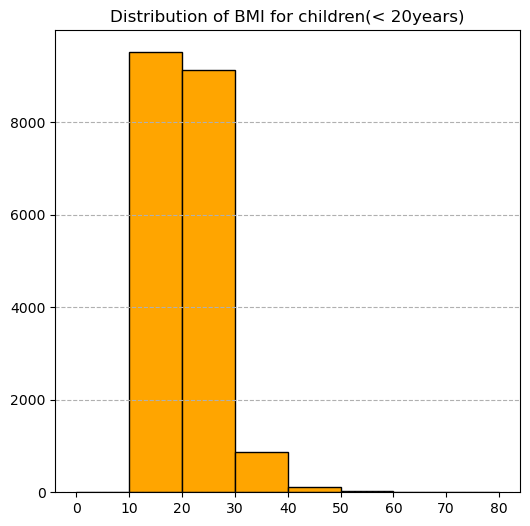

In [37]:
plt.figure(figsize=(6,6))
plt.title("Distribution of BMI for children(< 20years)")
plt.grid(axis='y',linestyle='--')
plt.hist(children['bmi'],color='orange',bins=[0,10,20,30,40,50,60,70,80],edgecolor='black')
plt.show()

### Blood glucose level and Diabetes 

In [38]:
df['blood_glucose_level'].value_counts()

130    7794
159    7759
140    7732
160    7712
126    7702
145    7679
200    7600
155    7575
90     7112
80     7106
158    7026
100    7025
85     6901
280     729
300     674
240     636
260     635
220     603
Name: blood_glucose_level, dtype: int64

In [39]:
normal = df[df['blood_glucose_level']<100].blood_glucose_level.count()
prediabetic = df[(df['blood_glucose_level'] >= 100 ) & (df['blood_glucose_level'] < 125)].blood_glucose_level.count()
diabetic = df[df['blood_glucose_level'] >= 125].blood_glucose_level.count()
print("Normal: ", normal)
print("Prediabetic: ", prediabetic)
print("Diabetic : ", diabetic)

Normal:  21119
Prediabetic:  7025
Diabetic :  71856


In [40]:
Blood_Glucose = pd.Series([normal,prediabetic,diabetic], index=["Normal", "Prediabetic", "Diabetic"])
Blood_Glucose

Normal         21119
Prediabetic     7025
Diabetic       71856
dtype: int64

<BarContainer object of 3 artists>

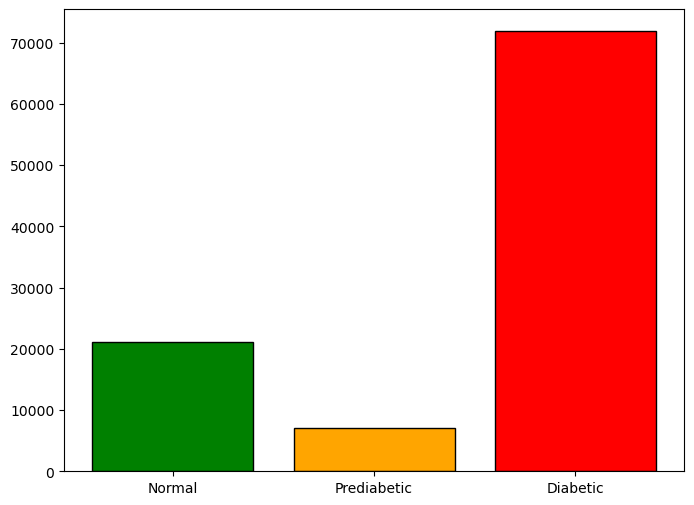

In [41]:
plt.figure(figsize=(8,6))
plt.bar(Blood_Glucose.index, Blood_Glucose.values, edgecolor='Black', color=['Green', 'Orange', 'Red'])

In [42]:
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

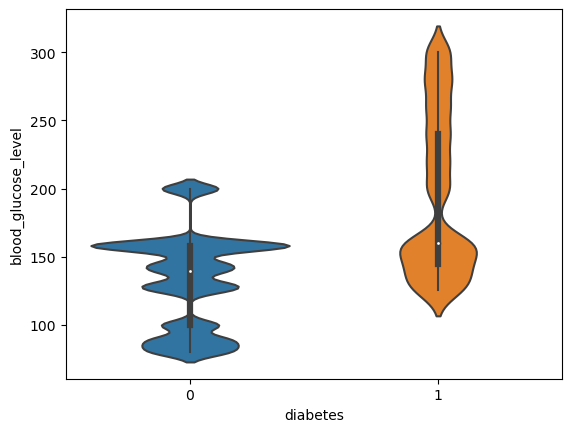

In [43]:
sns.violinplot(y='blood_glucose_level',x = 'diabetes',data=df)
plt.show()

# Relation Between Columns 

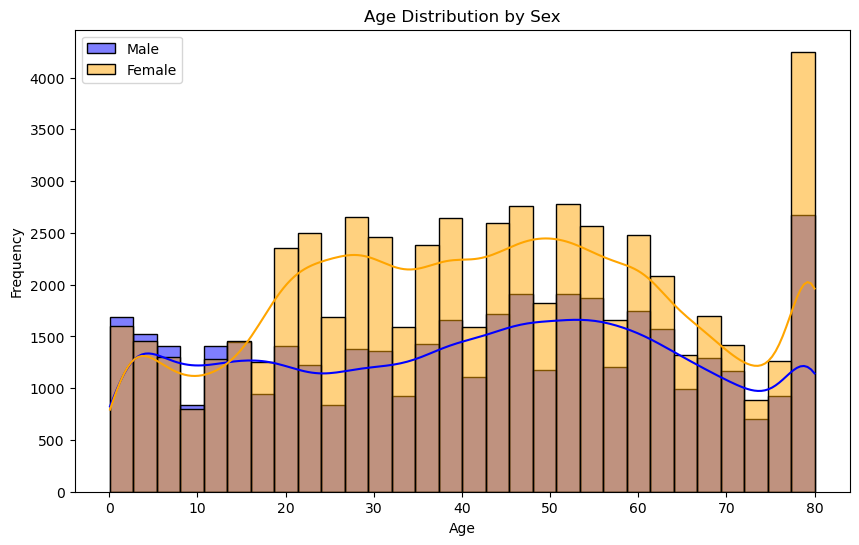

In [44]:
plt.figure(figsize=(10, 6))

# Create separate histograms for each gender
sns.histplot(df[df['gender'] == 'Male']['age'], label='Male', kde=True, color='blue', bins=30)
sns.histplot(df[df['gender'] == 'Female']['age'], label='Female', kde=True, color='orange', bins=30)

plt.title('Age Distribution by Sex')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

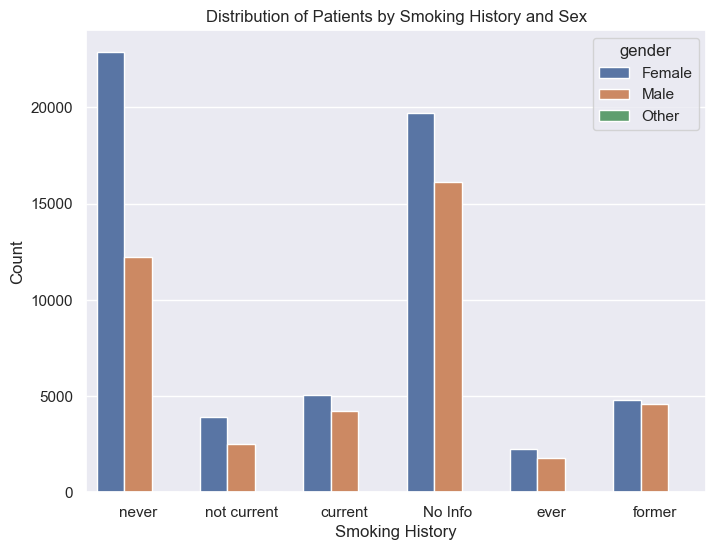

In [45]:
# Visualize the relationship between 'Pclass' and 'Sex'
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

# Create a count plot
sns.countplot(x='smoking_history', hue='gender', data=df)

# Set labels and title
plt.title('Distribution of Patients by Smoking History and Sex')
plt.xlabel('Smoking History')
plt.ylabel('Count')

# Show the plot
plt.show()

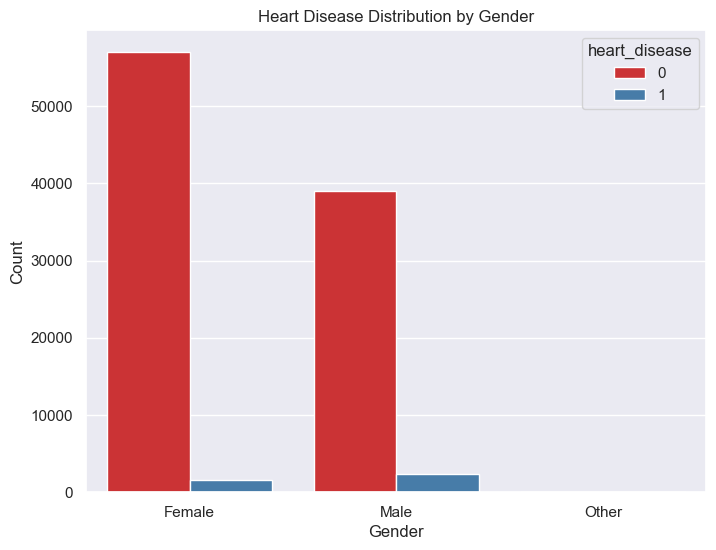

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.countplot(x='gender', hue='heart_disease', data=df, palette='Set1')
plt.title('Heart Disease Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


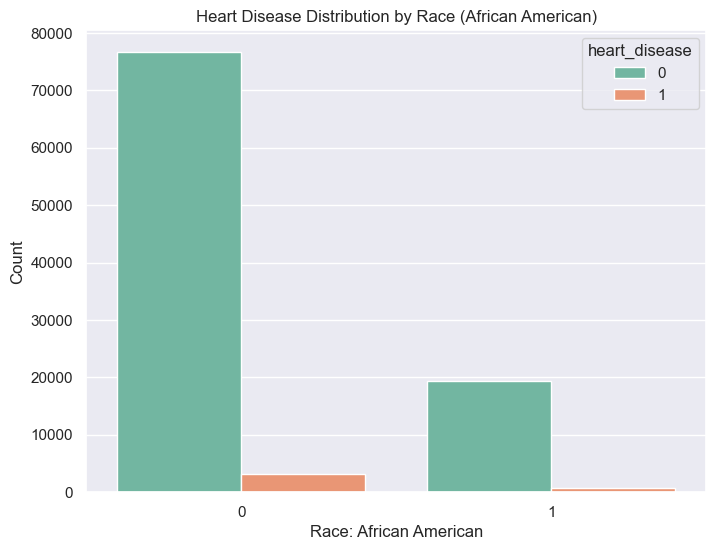

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(x='race:AfricanAmerican', hue='heart_disease', data=df, palette='Set2')
plt.title('Heart Disease Distribution by Race (African American)')
plt.xlabel('Race: African American')
plt.ylabel('Count')
plt.show()


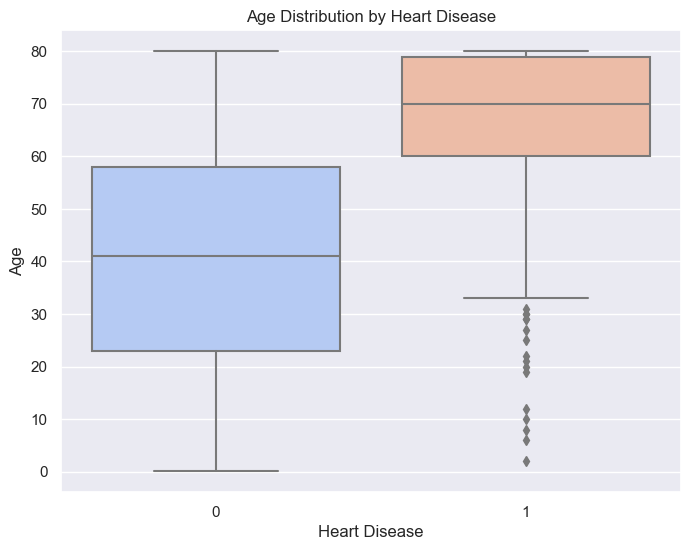

In [48]:
plt.figure(figsize=(8,6))
sns.boxplot(x='heart_disease', y='age', data=df, palette='coolwarm')
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()


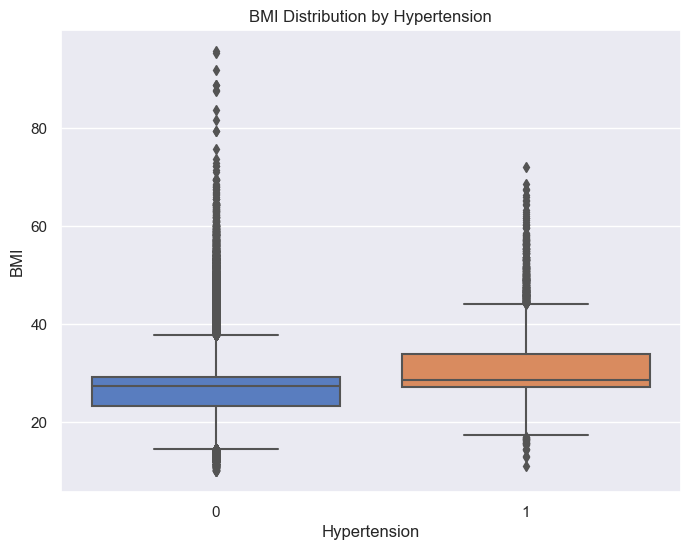

In [49]:
plt.figure(figsize=(8,6))
sns.boxplot(x='hypertension', y='bmi', data=df, palette='muted')
plt.title('BMI Distribution by Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('BMI')
plt.show()


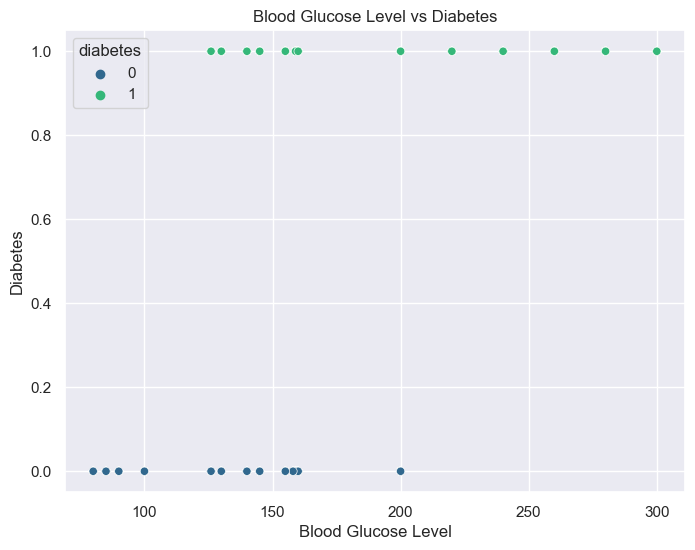

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='blood_glucose_level', y='diabetes', data=df, hue='diabetes', palette='viridis')
plt.title('Blood Glucose Level vs Diabetes')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Diabetes')
plt.show()


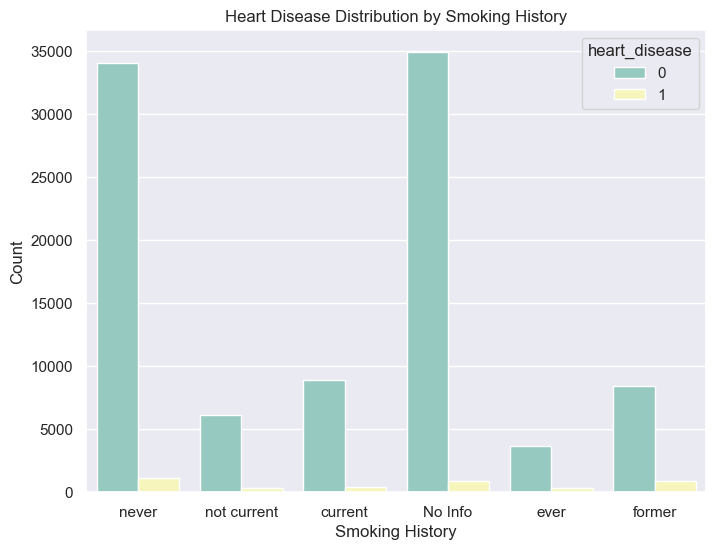

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(x='smoking_history', hue='heart_disease', data=df, palette='Set3')
plt.title('Heart Disease Distribution by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.show()


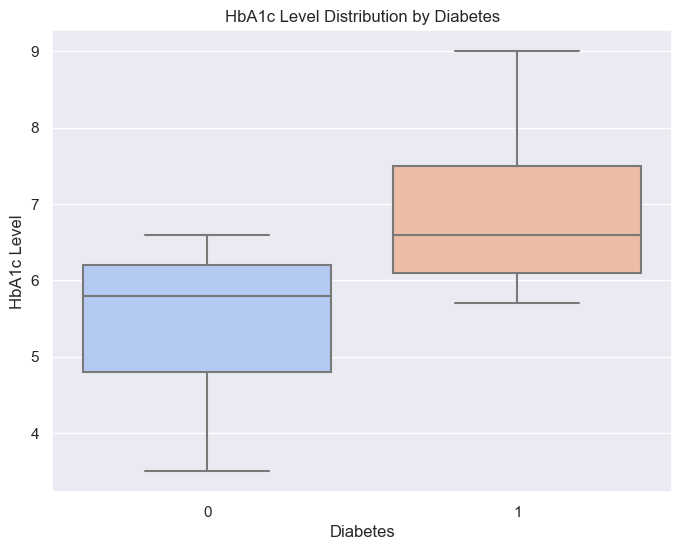

In [52]:
plt.figure(figsize=(8,6))
sns.boxplot(x='diabetes', y='hbA1c_level', data=df, palette='coolwarm')
plt.title('HbA1c Level Distribution by Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('HbA1c Level')
plt.show()


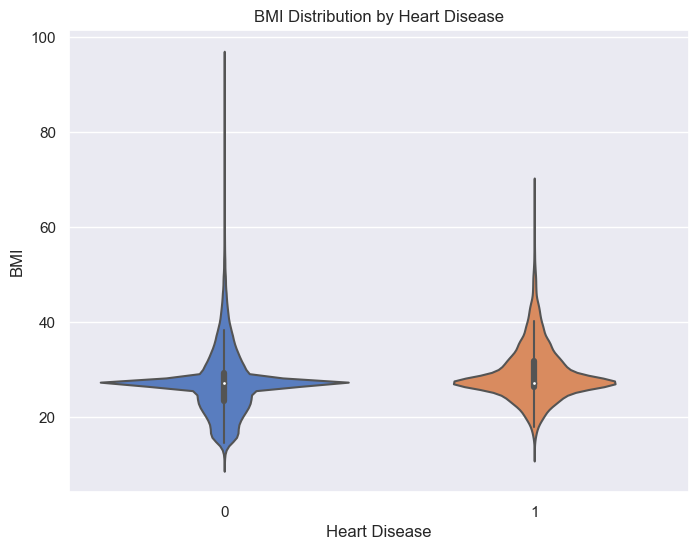

In [53]:
plt.figure(figsize=(8,6))
sns.violinplot(x='heart_disease', y='bmi', data=df, palette='muted')
plt.title('BMI Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('BMI')
plt.show()


C:\Users\abanoup\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


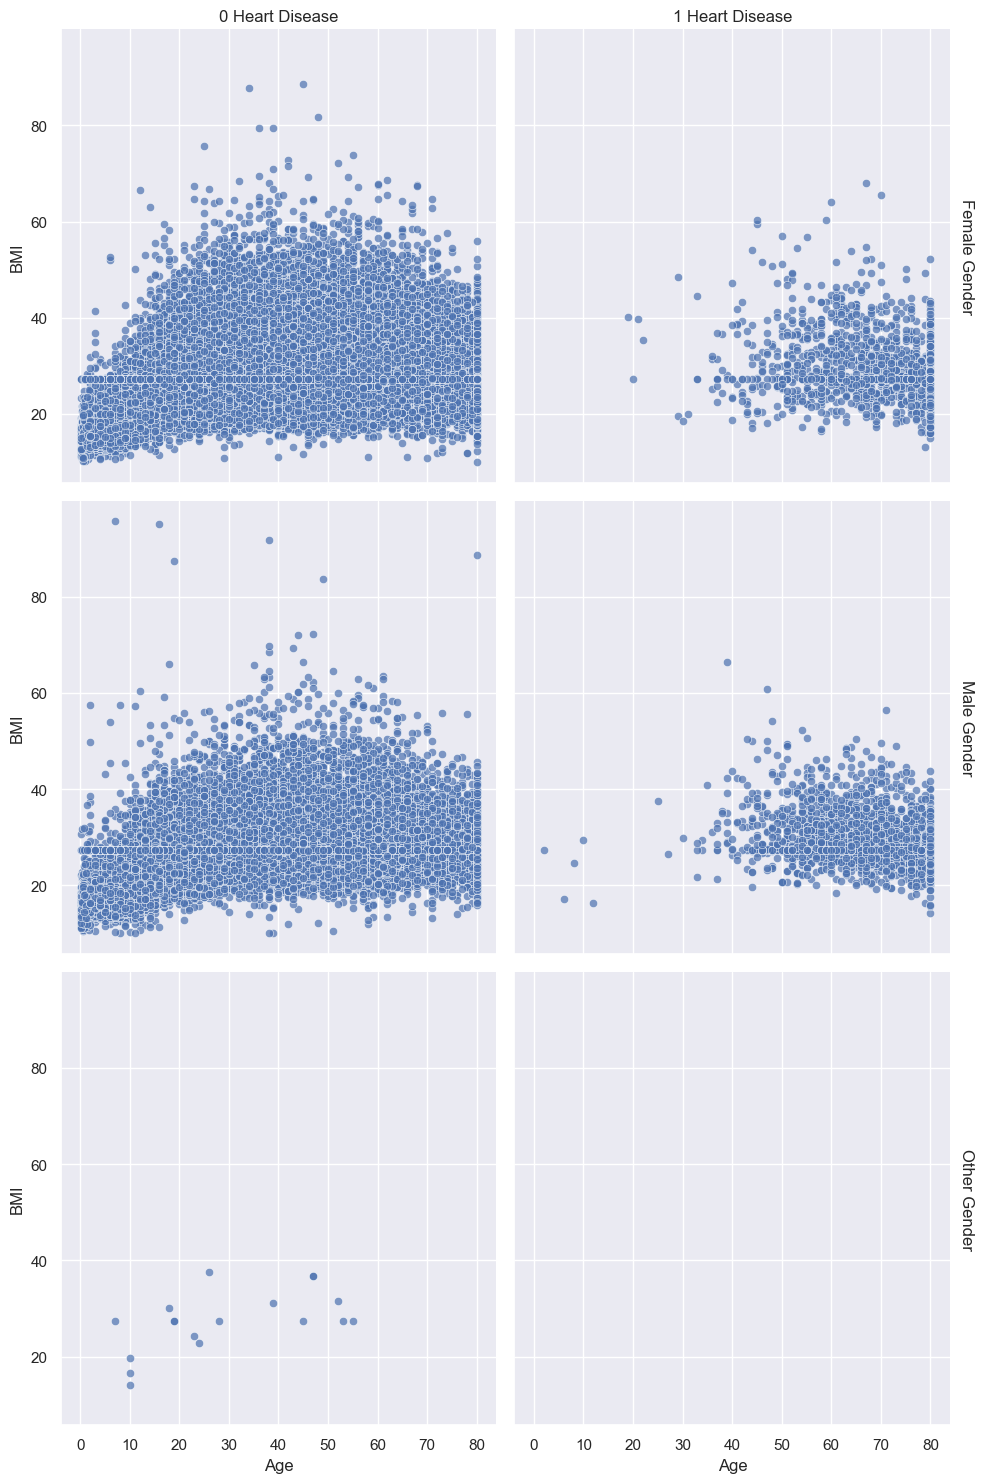

In [54]:
g = sns.FacetGrid(df, col='heart_disease', row='gender', margin_titles=True, height=5)
g.map(sns.scatterplot, 'age', 'bmi', alpha=0.7)
g.set_axis_labels('Age', 'BMI')
g.set_titles(col_template='{col_name} Heart Disease', row_template='{row_name} Gender')
plt.show()


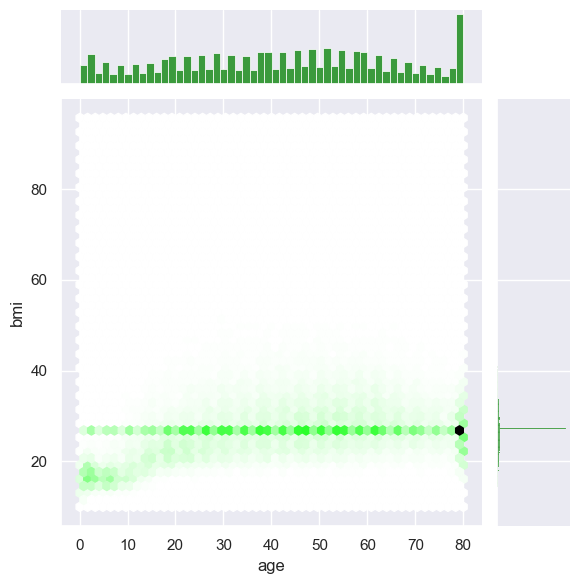

In [55]:
sns.jointplot(x='age', y='bmi', data=df, kind='hex', color='green')
plt.show()


C:\Users\abanoup\AppData\Local\Temp\ipykernel_2504\2129064541.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['bmi'], shade=True, color="r", alpha=0.7)


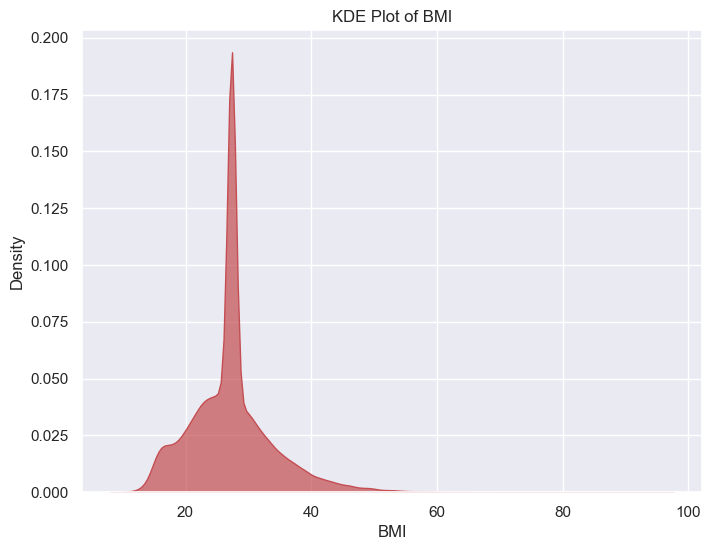

In [56]:
plt.figure(figsize=(8,6))
sns.kdeplot(df['bmi'], shade=True, color="r", alpha=0.7)
plt.title('KDE Plot of BMI')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()


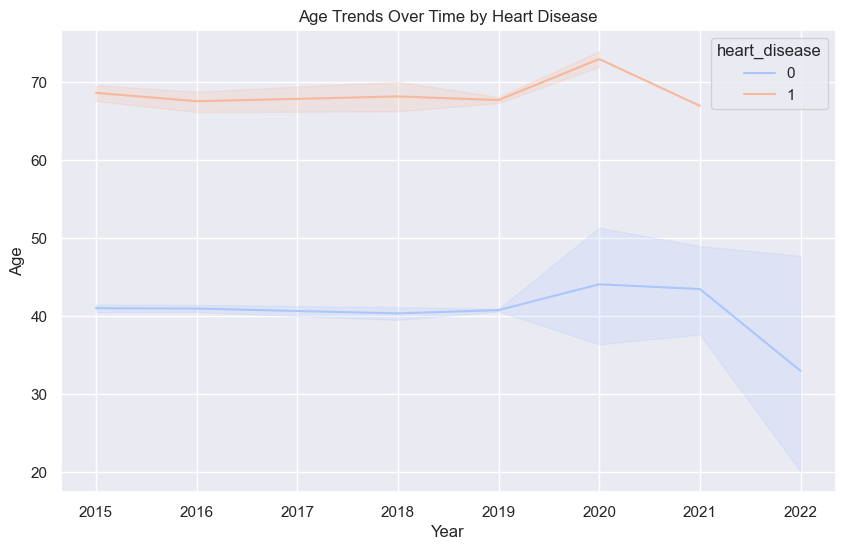

In [57]:
plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='age', data=df, hue='heart_disease', palette='coolwarm')
plt.title('Age Trends Over Time by Heart Disease')
plt.xlabel('Year')
plt.ylabel('Age')
plt.show()


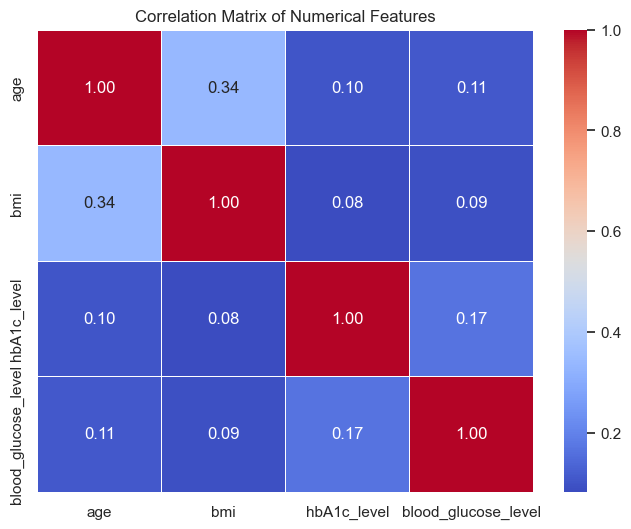

In [58]:
corr = df[['age', 'bmi', 'hbA1c_level', 'blood_glucose_level']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


C:\Users\abanoup\AppData\Local\Temp\ipykernel_2504\2375327759.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=1)


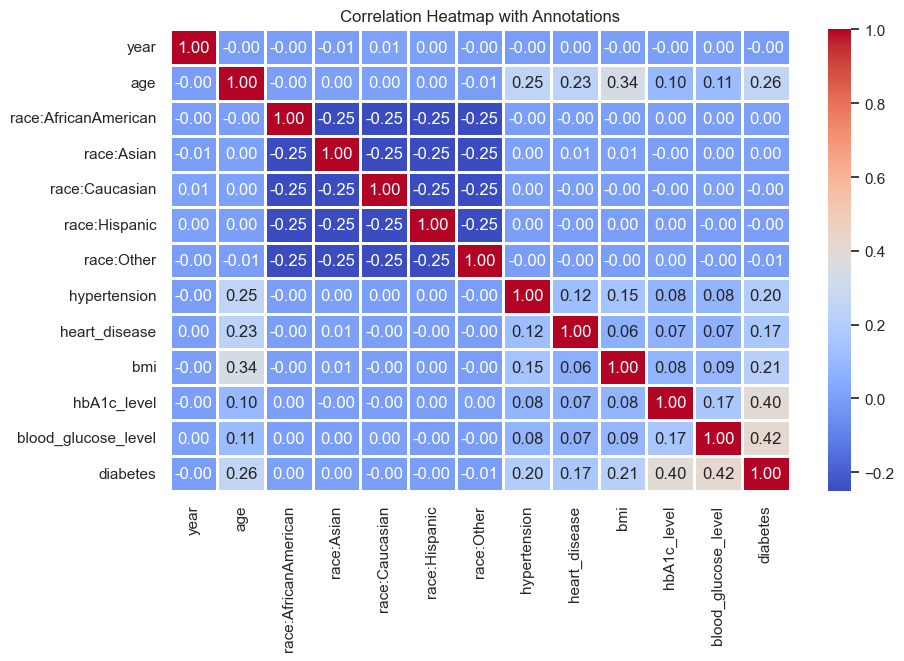

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=1)
plt.title('Correlation Heatmap with Annotations')
plt.show()


In [60]:
df.to_csv('Diabetes_Preproccesd.csv',index=False)